In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import time

def load_data(file_path: str):
    df = pd.read_csv(file_path, header=None)
    df.columns = [
        'sepal_length',
        'sepal_width',
        'petal_length',
        'petal_width',
        'class'
    ]
    return df


df = load_data('/content/drive/MyDrive/Colab Notebooks/31_DM/30_homeWork3/iris.data')
# %%
x: pd.DataFrame = df.iloc()[:, :-1]
scaler = StandardScaler()
x_nol = scaler.fit_transform(x)
x_nol=pd.DataFrame(x_nol,columns=x.columns)
x_nol

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# Hierarchical  fit


In [2]:
k_stat = time.time()
hierarchical = AgglomerativeClustering(n_clusters=3,compute_distances=True)
hierarchical_lable = hierarchical.fit_predict(x_nol)
k_end = time.time() - k_stat
print(f'using time is {k_end*1000:.6f} ms ')

using time is 69.840193 ms 


In [3]:
df['hierarchical_lable'] = hierarchical_lable

df_hierarchical = df.pivot_table(index=['hierarchical_lable'],
                     columns=['class'],
                     values=['sepal_length'],
                     aggfunc="count")

df_hierarchical.columns = df['class'].value_counts().index
df_hierarchical = df_hierarchical.fillna(value=0)
df_hierarchical

,Iris-virginica,Iris-versicolor,Iris-setosa
hierarchical_lable,,,
0,0.0,23.0,48.0
1,49.0,0.0,0.0
2,1.0,27.0,2.0


# purity

In [4]:
def get_purity(df: pd.DataFrame):
    temp = df / df.sum()
    purity = temp.max()
    return purity


df_hierarchical['purity'] = df_hierarchical.apply(get_purity, axis=1)
df_hierarchical['purity_weight'] = (df_hierarchical['purity'] * (df_hierarchical.iloc()[:, :-1].sum(axis=1) / df_hierarchical.iloc()[:, :-1].sum(axis=1).sum()))
hierarchical_total_purity = df_hierarchical['purity_weight'].sum()
print(f'total purity for hierarchical is {hierarchical_total_purity:.6f}')
df_hierarchical

total purity for hierarchical is 0.826667


,Iris-virginica,Iris-versicolor,Iris-setosa,purity,purity_weight
hierarchical_lable,,,,,
0,0.0,23.0,48.0,0.676056,0.320000
1,49.0,0.0,0.0,1.000000,0.326667
2,1.0,27.0,2.0,0.900000,0.180000


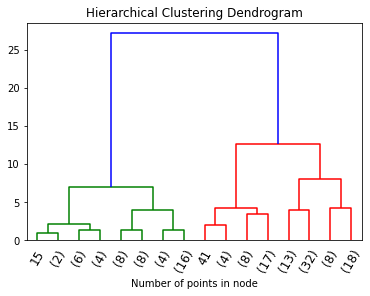

In [6]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(hierarchical, truncate_mode="level", p=3)
plt.xlabel("Number of points in node")
plt.xticks(rotation=60)
plt.show()